# Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installing Required Package

In [1]:
!pip install mmcv-full

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 563 kB 31.5 MB/s 
     |████████████████████████████████| 190 kB 57.1 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.6.1-cp37-cp37m-linux_x86_64.whl size=24796623 sha256=f462680c1cc63d9de32913843072fe67375afc4b315352632f546ecfccfa93fb
  Stored in directory: /root/.cache/pip/wheels/a6/f3/f8/bc5b70943e7de08aabc5902b1bfbedf08239db3a895910f7af
Successfully built mmcv-full


In [2]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

Cloning into 'mmdetection'...
remote: Enumerating objects: 31188, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 31188 (delta 46), reused 96 (delta 26), pack-reused 31049
Receiving objects: 100% (31188/31188), 40.55 MiB | 16.44 MiB/s, done.
Resolving deltas: 100% (22401/22401), done.
/content/mmdetection


In [3]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining mmtrack from git+https://github.com/open-mmlab/mmtracking#egg=mmtrack (from -r requirements/tests.txt (line 8))
  Cloning https://github.com/open-mmlab/mmtracking to ./src/mmtrack
  Running command git clone -q https://github.com/open-mmlab/mmtracking /content/mmdetection/src/mmtrack
     |████████████████████████████████| 472 kB 30.8 MB/s 
     |████████████████████████████████| 2.1 MB 51.7 MB/s 
     |████████████████████████████████| 509 kB 59.2 MB/s 
     |████████████████████████████████| 61 kB 482 kB/s 
     |████████████████████████████████| 45 kB 2.8 MB/s 
     |████████████████████████████████| 42 kB 823 kB/s 
     |████████████████████████████████| 92 kB 414 kB/s 
     |████████████████████████████████| 7.4 MB 21.5 MB/s 
     |████████████████████████████████| 4.9 MB 58.7 MB/s 
     |████████████████████████████████| 198 kB 65.8 MB/s 
     |████████████████████████████

# Preparation

In [2]:
%cd mmdetection

/content/mmdetection


In [3]:
import os
print(os.getcwd())
#os.chdir(r"../")

/content/mmdetection


In [4]:
from mmcv import Config
from mmdet.apis import set_random_seed
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector, init_detector, inference_detector, show_result_pyplot
import torch 
import mmcv

In [6]:
cfg = Config.fromfile('./configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py')

cfg.dataset_type = 'CocoDataset'

cfg.classes = ("Aortic_enlargement", "Atelectasis", 
               "Calcification", "Cardiomegaly", 
               "Consolidation", "ILD", "Infiltration", 
               "Lung_Opacity", "Nodule/Mass", "Other_lesion", 
               "Pleural_effusion", "Pleural_thickening", 
               "Pneumothorax", "Pulmonary_fibrosis")

# cfg.model.bbox_head.num_classes = 14 for Vfnet
cfg.model.roi_head.bbox_head.num_classes = 14

In [7]:
PREFIX = '/content/drive/MyDrive/MM Detection Tutorial/VinBigData - Coco Dataset/'

cfg.data.train.img_prefix = PREFIX
cfg.data.train.classes = cfg.classes
cfg.data.train.ann_file = PREFIX + 'train_annotations.json'
cfg.data.train.type = 'CocoDataset'

cfg.data.val.img_prefix = PREFIX
cfg.data.val.classes = cfg.classes
cfg.data.val.ann_file = PREFIX + 'val_annotations.json'
cfg.data.val.type = 'CocoDataset'

cfg.data.test.img_prefix = PREFIX
cfg.data.test.classes = cfg.classes
cfg.data.test.ann_file = PREFIX + 'val_annotations.json'
cfg.data.test.type = 'CocoDataset'

In [13]:
cfg.load_from = "/content/drive/MyDrive/MM Detection Tutorial/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth"
cfg.device = 'cuda'
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 600
#cfg.evaluation.metric = 'mAP' 
cfg.evaluation.metric = 'bbox' 
cfg.evaluation.interval = 3  # We can set the evaluation interval to reduce the evaluation times
cfg.checkpoint_config.interval = 3 # We can set the checkpoint saving interval to reduce the storage cost
cfg.seed = 0 # Set seed thus the results are more reproducible
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.work_dir = "/content/drive/MyDrive/MM Detection Tutorial/Results"
cfg.runner.max_epochs = 6
cfg.total_epochs = 6

# Model Training

In [14]:
datasets = [build_dataset(cfg.data.train)]
model = build_detector(cfg.model, train_cfg = cfg.get('train_cfg'), test_cfg = cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES
train_detector(model, datasets, cfg, distributed = False, validate = True)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


2022-09-10 10:29:50,012 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2022-09-10 10:29:50,051 - mmdet - INFO - load checkpoint from local path: /content/drive/MyDrive/MM Detection Tutorial/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


2022-09-10 10:29:50,442 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([15, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([15]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([56, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([56]).
unexpected key in source state_dict: roi_head.mask_head.convs.0.conv.weight, roi_head.mask_head.convs.0.conv.bias, roi_head.mask_head.convs.1.conv.weight, roi_head.mask_head.convs.1.conv.bias, roi_head.mask_head.convs.2.conv.weight, roi

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1098/1098, 9.3 task/s, elapsed: 118s, ETA:     0s

2022-09-10 11:06:08,484 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.23s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=4.33s).
Accumulating evaluation results...


2022-09-10 11:06:14,829 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.119
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.264
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.099
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.038
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.066
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.139
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.270
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.270
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.270
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.131
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.175
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=1.61s).


2022-09-10 11:10:24,357 - mmdet - INFO - Epoch [4][600/1649]	lr: 2.500e-03, eta: 0:22:45, time: 0.415, data_time: 0.012, memory: 3795, loss_rpn_cls: 0.0407, loss_rpn_bbox: 0.0305, loss_cls: 0.2868, acc: 91.4528, loss_bbox: 0.2828, loss: 0.6408
2022-09-10 11:14:32,356 - mmdet - INFO - Epoch [4][1200/1649]	lr: 2.500e-03, eta: 0:20:13, time: 0.413, data_time: 0.008, memory: 3795, loss_rpn_cls: 0.0391, loss_rpn_bbox: 0.0310, loss_cls: 0.2878, acc: 91.3802, loss_bbox: 0.2874, loss: 0.6453
2022-09-10 11:21:49,406 - mmdet - INFO - Epoch [5][600/1649]	lr: 2.500e-03, eta: 0:13:59, time: 0.415, data_time: 0.012, memory: 3795, loss_rpn_cls: 0.0365, loss_rpn_bbox: 0.0300, loss_cls: 0.2811, acc: 91.3890, loss_bbox: 0.2841, loss: 0.6317
2022-09-10 11:25:56,846 - mmdet - INFO - Epoch [5][1200/1649]	lr: 2.500e-03, eta: 0:11:09, time: 0.412, data_time: 0.009, memory: 3795, loss_rpn_cls: 0.0378, loss_rpn_bbox: 0.0310, loss_cls: 0.2867, acc: 91.4108, loss_bbox: 0.2874, loss: 0.6430
2022-09-10 11:33:13,34

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1098/1098, 9.4 task/s, elapsed: 117s, ETA:     0s

2022-09-10 11:42:27,825 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.18s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=3.56s).
Accumulating evaluation results...


2022-09-10 11:42:32,944 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.137
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.314
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.107
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.040
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.072
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.165
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.296
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.296
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.296
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.150
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.189
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=1.25s).


# Model Testing

In [19]:
img1 = mmcv.imread('/content/drive/MyDrive/MM Detection Tutorial/VinBigData - Coco Dataset/train_images/0007d316f756b3fa0baea2ff514ce945.jpg')
img2 = mmcv.imread('/content/drive/MyDrive/MM Detection Tutorial/VinBigData - Coco Dataset/val_images/0005e8e3701dfb1dd93d53e2ff537b6e.jpg')
model.cfg = cfg
result1 = inference_detector(model, img1)
result2 = inference_detector(model, img2)

# Visualizing the Result

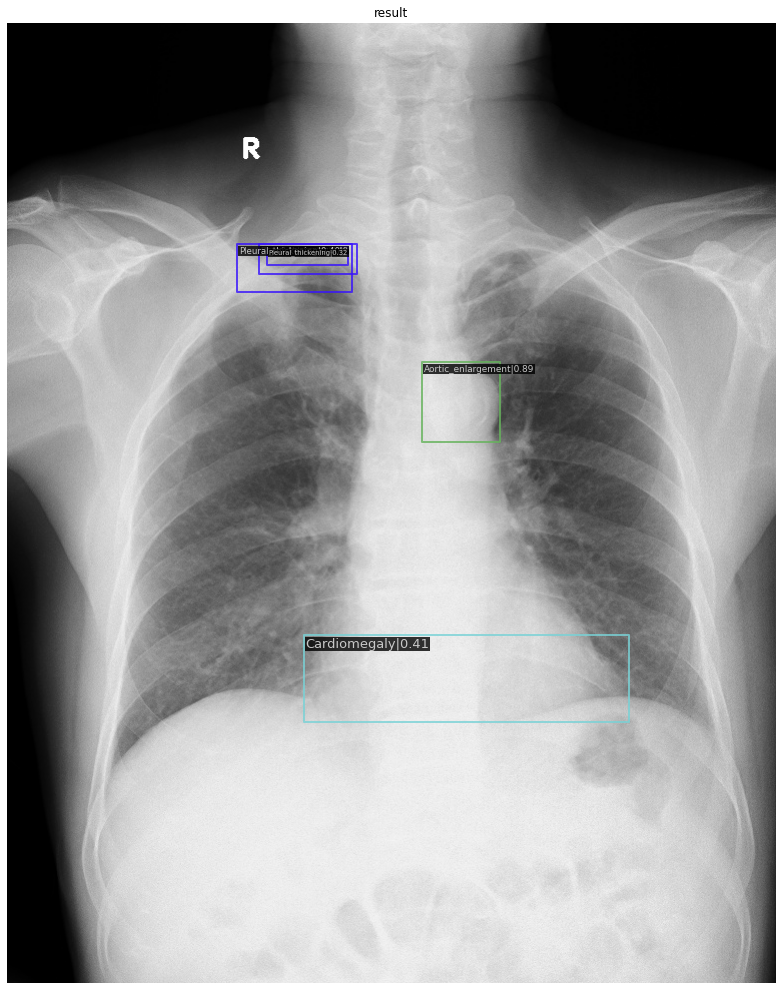

In [20]:
show_result_pyplot(model, img1, result1)

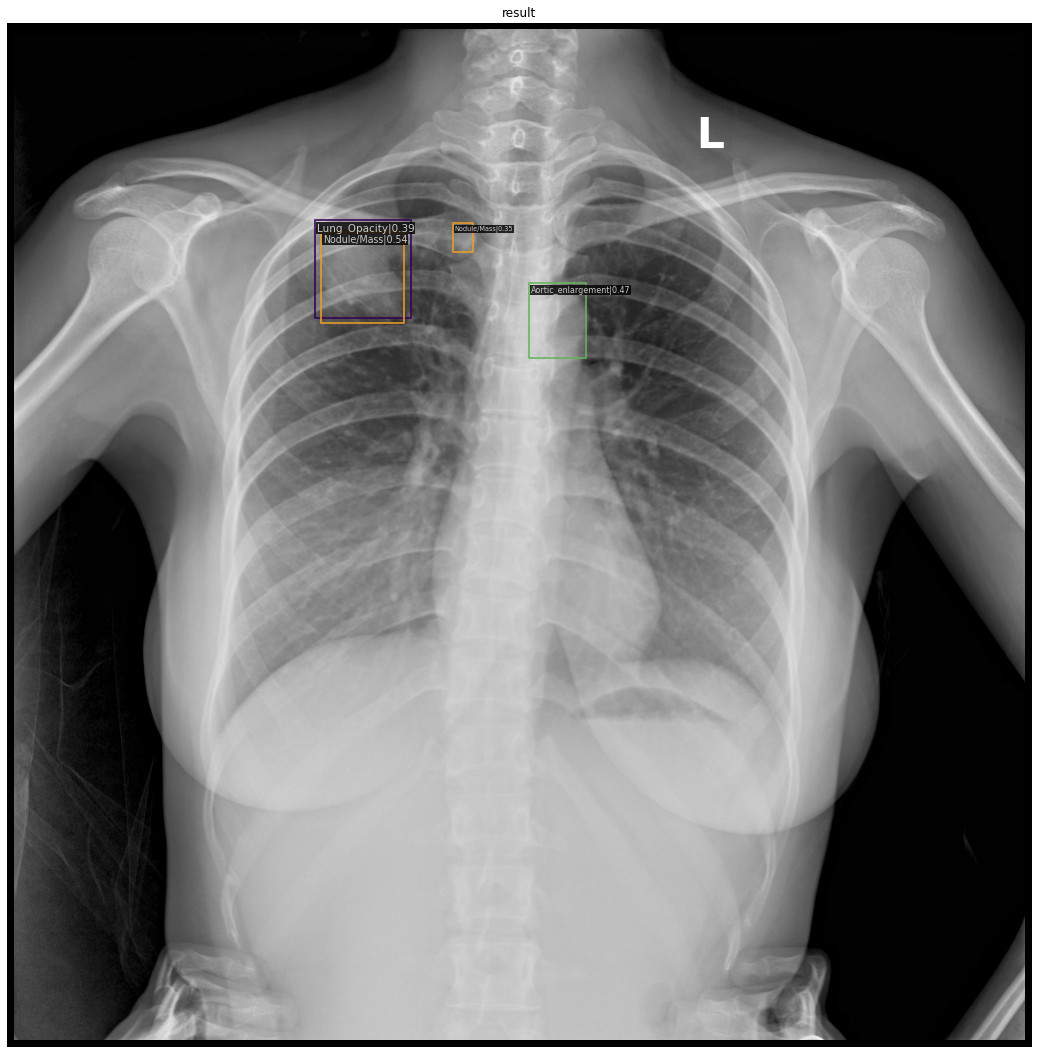

In [21]:
show_result_pyplot(model, img2, result2)

# References

In [ ]:
# Installations: https://github.com/open-mmlab/mmdetection/blob/master/docs/en/get_started.md/#Installation
# Tut 1: https://towardsdatascience.com/mmdetection-tutorial-an-end2end-state-of-the-art-object-detection-library-59064deeada3
# Tut 2: https://notebook.community/open-mmlab/mmdetection/demo/MMDet_Tutorial
# Synchronous interface example: https://github.com/open-mmlab/mmdetection/issues/1849
# How to get model checkpoints: https://github.com/open-mmlab/mmdetection/issues/1262
# Download Vfnet .pth file: https://github.com/open-mmlab/mmdetection/blob/master/configs/vfnet/README.md
# Adding cfg to model builder: https://github.com/open-mmlab/mmdetection/issues/4603 